In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

In [12]:
# --- Load all results into a single dataframe ---
results_dir = "../results"

data = []
for file in os.listdir(results_dir):
    if file.endswith(".csv"):
        arch = file.split("_")[0]  # e.g., logreg, svm, xgboost
        df = pd.read_csv(os.path.join(results_dir, file))
        df["architecture"] = arch
        data.append(df)

results_df = pd.concat(data, ignore_index=True)
results_df = results_df.sort_values(by=["architecture", "dataset", "kmer"])
results_df

,dataset,kmer,f1_val_macro,f1_test_macro,architecture
0,MLST,5,0.980669,0.979029,logreg
3,MLST,7,0.988904,0.988690,logreg
1,Serotype,5,0.980281,0.985042,logreg
4,Serotype,7,0.986092,0.987476,logreg
2,Subspecies,5,1.000000,1.000000,logreg
5,Subspecies,7,1.000000,1.000000,logreg
12,MLST,5,0.979949,0.980668,svm
15,MLST,7,0.991871,0.992853,svm
13,Serotype,5,0.980149,0.986529,svm
16,Serotype,7,0.986859,0.991340,svm


/scicomp/scratch/rqu4/tmp/ipykernel_1672067/4094710226.py:28: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/scicomp/scratch/rqu4/tmp/ipykernel_1672067/4094710226.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


Total bars: 24


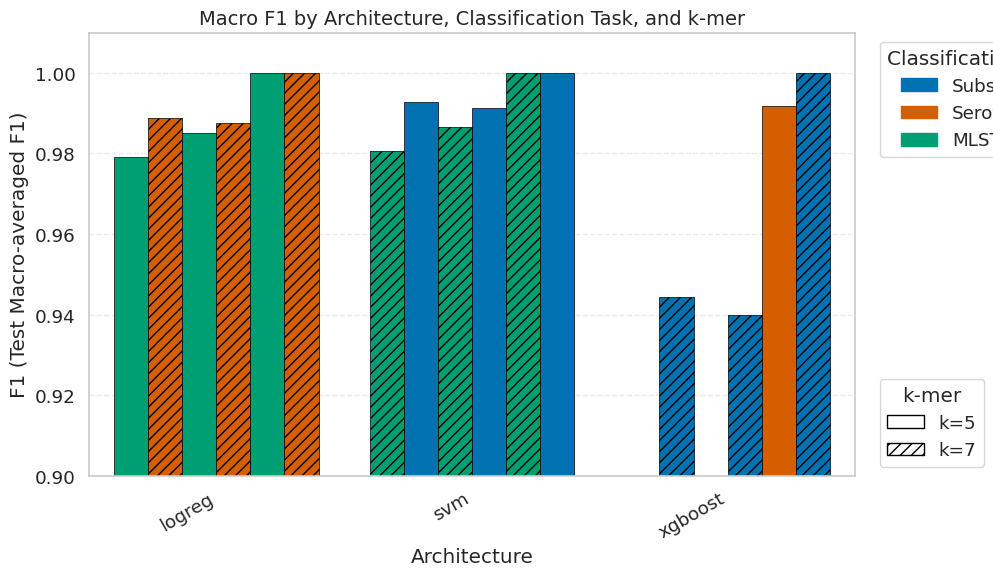

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


# --- Style maps ---
color_map = {
    "Subspecies": "#0072B2",  # blue
    "Serotype": "#D55E00",    # orange
    "MLST": "#009E73"         # green
}
hatch_map = {5: '', 7: '///'}

# --- Prepare data ---
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 6))

# Combine architecture + dataset for grouped x-axis
# results_df["arch_dataset"] = results_df["dataset"] + " | " + results_df["kmer"].astype(str)

# # Ensure consistent plotting order
# results_df = results_df.sort_values(["arch_dataset", "kmer"]).reset_index(drop=True)

# sns.catplot(data=results_df, x="architecture", y="f1_test_macro", hue="kmer", kind="bar", errorbar=None, ax=ax, dodge=True)

# --- Draw grouped barplot ---
sns.barplot(
    data=results_df,
    x="architecture",
    y="f1_test_macro",
    hue="arch_dataset",
    palette=["#999999", "#CCCCCC"],  # placeholder colors, will override
    ax=ax,
    errorbar=None,
    dodge=True
)


# --- Apply color + hatching ---
bars = ax.patches
print(f"Total bars: {len(bars)}")
num_bars = 18
num_kmers = 2

# bars are drawn in groups per x value, one per hue level
group_size = 6

# Loop over bars in order (Seaborn draws them grouped)
for i, bar in enumerate(bars):
    row = results_df.iloc[i % len(results_df)]
    bar.set_facecolor(color_map[row["dataset"]])
    bar.set_hatch(hatch_map[row["kmer"]])
    bar.set_edgecolor("black")
    bar.set_linewidth(0.5)


# --- Labels and titles ---
ax.set_ylabel("F1 (Test Macro-averaged F1)")
ax.set_xlabel("Architecture")
ax.set_title("Macro F1 by Architecture, Classification Task, and k-mer", fontsize=14)

# --- Custom legends ---
dataset_patches = [mpatches.Patch(color=c, label=d) for d, c in color_map.items()]
kmer_patches = [
    mpatches.Patch(facecolor='white', edgecolor='black', hatch=h, label=f'k={k}')
    for k, h in hatch_map.items()
]


# Combine legends neatly on the right
legend1 = ax.legend(handles=dataset_patches, title="Classification task",
                    loc='upper left', bbox_to_anchor=(1.02, 1))
ax.add_artist(legend1)
ax.legend(handles=kmer_patches, title="k-mer",
           loc='lower left', bbox_to_anchor=(1.02, 0))
ax.set_ylim(0.9, 1.01)
ax.grid(axis="y", linestyle="--", alpha=0.4, zorder=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # pad right for legends
plt.show()

/scicomp/scratch/rqu4/tmp/ipykernel_1672067/1795758199.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


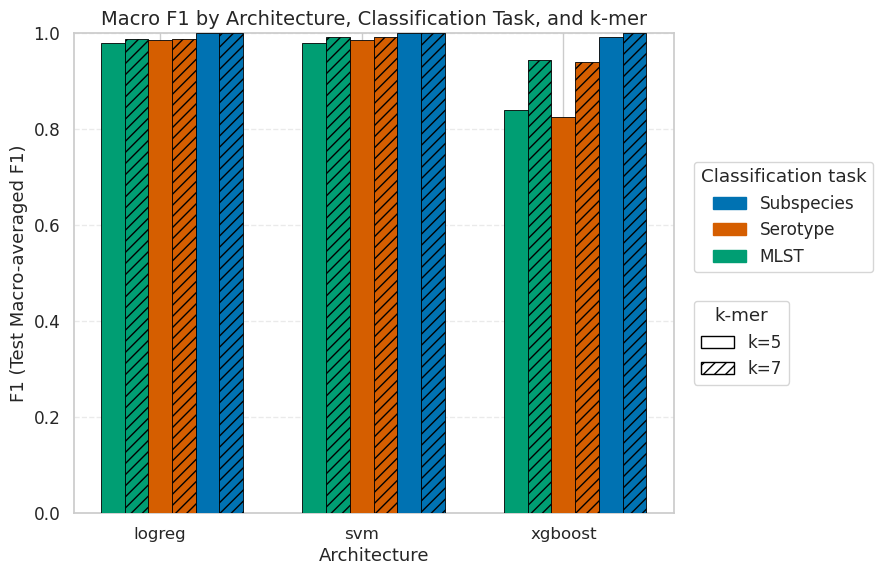

In [80]:
# --- Style maps ---
color_map = {
    "Subspecies": "#0072B2",  # blue
    "Serotype": "#D55E00",    # orange
    "MLST": "#009E73"         # green
}
hatch_map = {5: '', 7: '///'}

# --- Desired explicit order ---
arch_order = ["logreg", "svm", "xgboost"]
dataset_order = ["MLST", "Serotype", "Subspecies"]
kmer_order = [5, 7]   # ensure these are ints in the DF

# make sure column types match
results_df = results_df.copy()
results_df["architecture"] = results_df["architecture"].astype(str)
results_df["dataset"] = results_df["dataset"].astype(str)
results_df["kmer"] = results_df["kmer"].astype(int)

# --- Layout parameters (tweak widths/spacing if you'd like) ---
bar_width = 0.12          # width of a single bar
dataset_gap = 0        # gap between dataset groups inside an architecture
arch_gap = 0.3            # gap between architecture blocks

n_datasets = len(dataset_order)
n_kmers = len(kmer_order)
bars_per_dataset = n_kmers
per_dataset_block = bars_per_dataset * bar_width + dataset_gap
total_group_width = n_datasets * per_dataset_block - dataset_gap  # total width for one architecture block

# --- Plot setup ---
sns.set(style="whitegrid", font_scale=1.1)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0.08, 0.1, 0.5, 0.8]) # left, bottom, width, height

# store x positions to compute tick centers
arch_centers = []

# Draw bars explicitly in the exact order
for i, arch in enumerate(arch_order):
    base = i * (total_group_width + arch_gap)  # leftmost x for this architecture
    # center for the architecture tick
    arch_centers.append(base + total_group_width / 2 - bar_width/2)
    for j, ds in enumerate(dataset_order):
        for k_idx, kmer in enumerate(kmer_order):
            xpos = base + j * per_dataset_block + k_idx * bar_width
            # fetch the value (there should be exactly one row matching)
            mask = (
                (results_df["architecture"] == arch) &
                (results_df["dataset"] == ds) &
                (results_df["kmer"] == int(kmer))
            )
            if mask.any():
                value = float(results_df.loc[mask, "f1_test_macro"].iloc[0])
            else:
                value = 0.0  # fallback if missing
            # draw the bar
            bar = ax.bar(
                xpos,
                value,
                width=bar_width,
                align="edge",
                color=color_map[ds],
                hatch=hatch_map[kmer],
                edgecolor="black",
                linewidth=0.6,
                zorder=3
            )

# --- Axis formatting ---
#ax.set_xlim(-0.1, arch_order.__len__() * (total_group_width + arch_gap) - arch_gap + 0.1)
ax.set_xticks(arch_centers)
ax.set_xticklabels(arch_order, fontsize=12)
ax.set_ylabel("F1 (Test Macro-averaged F1)", fontsize=13)
ax.set_xlabel("Architecture", fontsize=13)
ax.set_ylim(0, 1)   # full 0–1 scale
ax.grid(axis="y", linestyle="--", alpha=0.4, zorder=0)
plt.title("Macro F1 by Architecture, Classification Task, and k-mer", fontsize=14)

# --- Legends ---
dataset_patches = [mpatches.Patch(color=c, label=d) for d, c in color_map.items()]
kmer_patches = [mpatches.Patch(facecolor='white', edgecolor='black', hatch=h, label=f'k={k}') for k, h in hatch_map.items()]

# legend1 = ax.legend(handles=dataset_patches, title="Classification task",
#                     loc='upper left', bbox_to_anchor=(1, 1))
# 
legend1 = ax.legend(handles=kmer_patches, title="k-mer",
           loc='lower left', bbox_to_anchor=(1.02, 0.25))
ax.add_artist(legend1)

ax.legend(handles=dataset_patches, title="Classification task",
                    loc='upper left', bbox_to_anchor=(1.02, 0.75))

plt.tight_layout()
plt.show()